<a href="https://colab.research.google.com/github/caraujom/Labs_IH/blob/main/FIFAcra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import time
from datetime import date
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
import statistics as stat 


In [2]:
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 10000)

In [3]:
data=pd.read_csv('fifa21_training.csv')

In [4]:
data.shape

(13700, 102)

In [ ]:
data.dtypes

In [7]:
data.columns.values

array(['Unnamed: 0', 'ID', 'Name', 'Age', 'Nationality', 'Club', 'BP',
       'Position', 'Team & Contract', 'Height', 'Weight', 'foot',
       'Growth', 'Joined', 'Loan Date End', 'Value', 'Wage',
       'Release Clause', 'Contract', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing',
       'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed',
       'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power',
       'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality',
       'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking',
       'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving',
       'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes',
       'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR',
       'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits', 'LS', 'ST', 'RS'

In [8]:
data.columns=data.columns.str.replace(' ', '')

In [9]:
#Espacios Eliminados
data.columns.values

array(['Unnamed:0', 'ID', 'Name', 'Age', 'Nationality', 'Club', 'BP',
       'Position', 'Team&Contract', 'Height', 'Weight', 'foot', 'Growth',
       'Joined', 'LoanDateEnd', 'Value', 'Wage', 'ReleaseClause',
       'Contract', 'Attacking', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Movement',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'Power', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Mentality', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending',
       'Marking', 'StandingTackle', 'SlidingTackle', 'Goalkeeping',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning',
       'GKReflexes', 'TotalStats', 'BaseStats', 'W/F', 'SM', 'A/W', 'D/W',
       'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF

In [10]:
data.isnull().sum()

Unnamed:0              0
ID                     0
Name                   0
Age                    0
Nationality            0
Club                  21
BP                     0
Position             343
Team&Contract          0
Height                 0
Weight                 0
foot                   0
Growth                 0
Joined                44
LoanDateEnd        12961
Value                  0
Wage                   0
ReleaseClause          0
Contract               0
Attacking              0
Crossing               0
Finishing              0
HeadingAccuracy        0
ShortPassing           0
Volleys               44
Skill                  0
Dribbling              0
Curve                 44
FKAccuracy             0
LongPassing            0
BallControl            0
Movement               0
Acceleration           0
SprintSpeed            0
Agility               44
Reactions              0
Balance               44
Power                  0
ShotPower              0
Jumping               44


In [11]:
data.isna().sum().sum()

14154

In [12]:
data.describe(include='all')

,Unnamed:0,ID,Name,Age,Nationality,Club,BP,Position,Team&Contract,Height,Weight,foot,Growth,Joined,LoanDateEnd,Value,Wage,ReleaseClause,Contract,Attacking,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Skill,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Movement,Acceleration,SprintSpeed,Agility,Reactions,Balance,Power,ShotPower,Jumping,Stamina,Strength,LongShots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,StandingTackle,SlidingTackle,Goalkeeping,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,TotalStats,BaseStats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
count,13700.000000,13700.000000,13700,13700.000000,13700,13679,13700,13357,13700,13700,13700,13700,13700.000000,13656,739,13700,13700,13700,13700,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13656.000000,13700.000000,13700.000000,13656.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13656.000000,13700.000000,13656.000000,13700.000000,13700.000000,13656.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13693.000000,13693.000000,13656.000000,13700.000000,13371.000000,13700.000000,13700.000000,13700.000000,13656.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700,13700,13633,13633,13700,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700,13700,13700,13700,13700,13700,13700,13700,13700,13700,13700,13700,13700,13700,13700,13700,13700,13700,13700,13700,13700,13700,13700,13700,13700,13700,13700,13700,13700.000000
unique,NaN,NaN,13064,NaN,160,897,15,583,8524,21,55,2,NaN,1803,35,210,142,1147,385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,3,3,5,NaN,NaN,NaN,NaN,NaN,NaN,482,265,265,265,169,156,156,156,169,309,309,309,294,258,258,258,294,271,301,301,301,271,265,321,321,321,265,158,NaN
top,NaN,NaN,J. Rojas,NaN,England,Everton,CB,CB,India Free,"6'0""",154lbs,Right,NaN,"Jul 1, 2019","Jun 30, 2021",€1.1M,€2K,€0,2019 ~ 2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3 ★,2★,Medium,Medium,1 ★,NaN,NaN,NaN,NaN,NaN,NaN,3,61+2,61+2,61+2,64+0,62+0,62+0,62+0,64+0,62+2,62+2,62+2,61+2,61+2,61+2,61+2,61+2,59+2,59+2,59+2,59+2,59+2,62+2,61+2,61+2,61+2,62+2,16+2,NaN
freq,NaN,NaN,8,NaN,1342,38,2553,1595,30,2053,1073,10322,NaN,940,443,398,1915,1432,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8436,6004,8808,9814,12118,NaN,NaN,NaN,NaN,NaN,NaN,2785,497,497,497,588,569,569,569,588,536,536,536,535,526,526,526,535,514,410,410,410,514,454,360,360,360,454,2510,NaN
mean,8561.641971,219378.929708,NaN,25.286058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.509927,NaN,NaN,NaN,NaN,NaN,NaN,258.313431,51.585766,47.996934,53.460292,60.427956,44.986965,266.382993,57.784964,49.576377,44.389124,54.205620,60.586131,322.597007,65.410365,65.429051,64.578134,62.912117,64.682484,302.159343,59.747810,65.067223,63.222190,65.215328,49.115766,261.734891,56.938686,46.901848,52.397868,55.463459,50.261898,59.920051,140.876934,47.042774,48.094818,45.886716,78.039343,15.685620,15.561825,15.548175,15.597956,15.830292,1630.103942,361.317007,NaN,NaN,NaN,NaN,NaN,68.108832,55.056423,58.931679,64.236277,50.123577,64.860219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.945912
std,4954.144383,37445.343736,NaN,4.944498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.797176,NaN,NaN,NaN,NaN,NaN,NaN,72.412379,17.899930,19.411530,17.010578,13.975634,17.760924,77.062358,18.097397,18.213

In [361]:
#Separacion de DF en numérico y categórico
data_numeric=data.select_dtypes(['int','float'])
data_numeric

,Unnamed:0,ID,Age,Growth,Attacking,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Skill,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Movement,Acceleration,SprintSpeed,Agility,Reactions,Balance,Power,ShotPower,Jumping,Stamina,Strength,LongShots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,StandingTackle,SlidingTackle,Goalkeeping,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,TotalStats,BaseStats,PAC,SHO,PAS,DRI,DEF,PHY,OVA
0,1954,184383,26,1,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,69,51,63,63,51,60,64
1,2225,188044,30,0,365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,83,75,68,82,33,71,77
2,1959,184431,33,0,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,80,77,78,86,27,56,80
3,9815,233796,22,13,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,57,44,54,57,57,60,59
4,10074,234799,23,8,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,66,44,60,64,60,66,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,11284,239074,21,11,197,59,23,42,51,22.0,207,51,30.0,29,41,56,344,74,78,63.0,50,79.0,245,31,66.0,68,50,30,232,59,52.0,51.0,34.0,36,59.0,167,52,57,58.0,51,6,15,7,10,13,1443,315,76,28,46,55,53,57,60
13696,11964,241223,21,9,77,13,9,14,34,7.0,70,9,13.0,10,25,13,192,31,30,36.0,59,36.0,177,43,44.0,23,60,7,88,21,8.0,4.0,36.0,19,33.0,36,14,11,11.0,288,60,55,57,54,62,928,318,60,55,57,62,30,54,59
13697,5390,210930,27,0,332,76,72,34,79,71.0,373,77,76.0,65,77,78,351,64,65,74.0,73,75.0,329,63,60.0,83,57,66,306,41,40.0,75.0,81.0,69,75.0,118,36,43,39.0,58,12,15,16,9,6,1867,388,65,69,78,77,39,60,76
13698,860,162993,34,0,268,58,44,61,62,43.0,261,56,47.0,37,60,61,288,54,52,57.0,61,64.0,300,53,65.0,68,68,46,297,74,62.0,54.0,56.0,51,60.0,182,61,62,59.0,43,10,7,9,9,8,1639,346,53,47,58,58,61,69,63


In [362]:
#Tratamiento de nulos en numéricos
data_numeric.isnull().sum()

Unnamed:0            0
ID                   0
Age                  0
Growth               0
Attacking            0
Crossing             0
Finishing            0
HeadingAccuracy      0
ShortPassing         0
Volleys             44
Skill                0
Dribbling            0
Curve               44
FKAccuracy           0
LongPassing          0
BallControl          0
Movement             0
Acceleration         0
SprintSpeed          0
Agility             44
Reactions            0
Balance             44
Power                0
ShotPower            0
Jumping             44
Stamina              0
Strength             0
LongShots            0
Mentality            0
Aggression           0
Interceptions        7
Positioning          7
Vision              44
Penalties            0
Composure          329
Defending            0
Marking              0
StandingTackle       0
SlidingTackle       44
Goalkeeping          0
GKDiving             0
GKHandling           0
GKKicking            0
GKPositioni

In [ ]:
#Saca los nulos en porcentaje
nulls_p=(data_numeric.isna().sum()/len(data_numeric))*100
nulls_p=nulls_p.reset_index()
nulls_p.columns=['columna','porcentaje']
nulls_p

In [18]:
#Sacar Media y sustituir nulos en columnas numéricas

In [363]:
#Este ciclo hace  rellenar con la media las 10 variables
lista=['Volleys','Curve','Agility','Balance','Jumping','Interceptions','Positioning','Vision','Composure','SlidingTackle']

for i in lista:
      data_numeric[i]=data_numeric[i].fillna(np.mean(data_numeric[i]))

In [365]:
data_numeric.isnull().sum().sum()

0

In [ ]:
#eliminar columnas que no aportan a simple vista

In [33]:
#tratamiento Categóricas nulos

In [366]:
data_categoric=data.select_dtypes(['object'])
data_categoric

,Name,Nationality,Club,BP,Position,Team&Contract,Height,Weight,foot,Joined,LoanDateEnd,Value,Wage,ReleaseClause,Contract,W/F,SM,A/W,D/W,IR,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK
0,A. Pasche,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,4 ★,2★,High,Medium,1 ★,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1
1,Alan Carvalho,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,"Jan 16, 2015","Dec 31, 2020",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",3 ★,4★,High,Low,2 ★,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2
2,S. Giovinco,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,"Jan 31, 2019",NaN,€9M,€49K,€15.3M,2019 ~ 2022,4 ★,4★,High,Medium,2 ★,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2
3,J. Evans,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,Right,"Jul 1, 2016",NaN,€275K,€4K,€694K,2016 ~ 2021,2 ★,2★,Medium,Medium,1 ★,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2
4,Y. Demoncy,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,Right,"Jul 1, 2018",NaN,€725K,€2K,€1.4M,2018 ~ 2021,2 ★,3★,Low,Medium,1 ★,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,S. Aw,Senegal,Gil Vicente FC,LB,LB,Gil Vicente FC 2020 ~ 2023,"5'8""",143lbs,Left,"Aug 9, 2020",NaN,€325K,€1K,€731K,2020 ~ 2023,3 ★,2★,High,Medium,1 ★,4,44+2,44+2,44+2,51+0,48+0,48+0,48+0,51+0,48+2,48+2,48+2,53+2,48+2,48+2,48+2,53+2,58+2,52+2,52+2,52+2,58+2,58+2,54+2,54+2,54+2,58+2,15+2
13696,S. Mogi,Japan,Cerezo Osaka,GK,GK,Cerezo Osaka 2017 ~ 2021,"6'5""",176lbs,Right,"Jan 1, 2017",NaN,€190K,€700,€285K,2017 ~ 2021,2 ★,1★,Medium,Medium,1 ★,3,22+2,22+2,22+2,20+0,22+0,22+0,22+0,20+0,23+2,23+2,23+2,22+2,24+2,24+2,24+2,22+2,20+2,23+2,23+2,23+2,20+2,20+2,22+2,22+2,22+2,20+2,58+2
13697,Carles Gil,Spain,New England Revolution,RM,RM CAM CM,New England Revolution 2019 ~ 2024,"5'7""",146lbs,Left,"Feb 13, 2019",NaN,€8M,€9K,€12M,2019 ~ 2024,4 ★,4★,High,Medium,2 ★,15,67+2,67+2,67+2,74+0,73+0,73+0,73+0,74+0,76+0,76+0,76+0,75+1,74+2,74+2,74+2,75+1,62+2,60+2,60+2,60+2,62+2,57+2,47+2,47+2,47+2,57+2,18+2
13698,J. Perch,England,Mansfield Town,CDM,CDM RB CM,Mansfield Town 2020 ~ 2021,"5'11""",176lbs,Right,"Aug 13, 2020",NaN,€140K,€4K,€245K,2020 ~ 2021,3 ★,2★,Medium,Medium,1 ★,4,55+2,55+2,55+2,56+0,55+0,55+0,55+0,56+0,57+2,57+2,57+2,57+2,59+2,59+2,59+2,57+2,60+2,62+1,62+1,62+1,60+2,60+2,63+0,63+0,63+0,60+2,14+2


In [367]:
data_categoric.isnull().sum()

Name                 0
Nationality          0
Club                21
BP                   0
Position           343
Team&Contract        0
Height               0
Weight               0
foot                 0
Joined              44
LoanDateEnd      12961
Value                0
Wage                 0
ReleaseClause        0
Contract             0
W/F                  0
SM                   0
A/W                 67
D/W                 67
IR                   0
Hits                 0
LS                   0
ST                   0
RS                   0
LW                   0
LF                   0
CF                   0
RF                   0
RW                   0
LAM                  0
CAM                  0
RAM                  0
LM                   0
LCM                  0
CM                   0
RCM                  0
RM                   0
LWB                  0
LDM                  0
CDM                  0
RDM                  0
RWB                  0
LB                   0
LCB        

In [ ]:
nulls_cat=(data_categoric.isna().sum()/len(data_categoric))*100
nulls_cat=nulls_cat.reset_index()
nulls_cat.columns=['columna','porcentaje']
nulls_cat

In [368]:
#eliminación columna con el 94% de nulos
data_categoric=data_categoric.drop(['LoanDateEnd'], axis =1)

In [369]:
data_categoric.shape

(13700, 47)

In [370]:
#convertir columna a formato fecha . NO TOMAR EN CUENTA EN MODELO
data_categoric['Joined']=pd.to_datetime(data_categoric['Joined'],errors='coerce')

In [ ]:
#cuenta las categorías diferentes en la columna
data_categoric['Club'].value_counts()

In [372]:
#saca la Moda de la columna categórica
stat.mode(data_categoric['Club'])

'Everton'

In [373]:
#con este ciclo rellenamos las 4 variables con nulos. en categoric
lista2=['Club', 'Position', 'Joined', 'A/W' ,'D/W']

for i in lista2:
      data_categoric[i]=data_categoric[i].fillna(stat.mode(data_categoric[i]))

In [374]:
data_categoric.isnull().sum().sum()

0

In [ ]:
data_categoric.dtypes

In [375]:
#converir columna cat a numérica 
data_categoric['Weight']=data_categoric['Weight'].str.replace(' ', '')
data_categoric['Weight']=data_categoric['Weight'].str.replace('lbs', '')
data_categoric['Weight']

0        161
1        159
2        134
3        152
4        150
        ... 
13695    143
13696    176
13697    146
13698    176
13699    150
Name: Weight, Length: 13700, dtype: object

In [376]:
data_categoric['Weight']= pd.to_numeric(data_categoric['Weight'],errors='coerce')
data_categoric['Weight']

0        161
1        159
2        134
3        152
4        150
        ... 
13695    143
13696    176
13697    146
13698    176
13699    150
Name: Weight, Length: 13700, dtype: int64

In [377]:
#convierte datos de altura en str a numérico
import re 
#data_numeric['Height_num']=np.zeros(len(data_categoric))
for i in range (len(data_categoric['Height'])):
  #data_numeric['Height_num'][i]=(float(str(data_categoric['Height'][i])[0])+float(str(re.search(r'(\'(\d)\")|(\'(\d)(\d)\")',data_categoric['Height'][i])[0])[1:-1])/12)
  data_categoric['Height'][i]=(float(str(data_categoric['Height'][i])[0])+float(str(re.search(r'(\'(\d)\")|(\'(\d)(\d)\")',data_categoric['Height'][i])[0])[1:-1])/12)

In [179]:
 data_categoric['Height']

0            5.75
1             6.0
2        5.333333
3        5.833333
4        5.916667
           ...   
13695    5.666667
13696    6.416667
13697    5.583333
13698    5.916667
13699    5.833333
Name: Height, Length: 13700, dtype: object

In [378]:
data_categoric['Height']= pd.to_numeric(data_categoric['Height'],errors='coerce')
data_categoric['Height']

0        5.750000
1        6.000000
2        5.333333
3        5.833333
4        5.916667
           ...   
13695    5.666667
13696    6.416667
13697    5.583333
13698    5.916667
13699    5.833333
Name: Height, Length: 13700, dtype: float64

In [379]:
data_categoric['Height'].isnull().sum()

0

In [ ]:
data_categoric.dtypes

In [62]:
#data_categoric['Wage'].value_counts()

In [380]:
data_categoric['Wage']=data_categoric['Wage'].str.replace(' ', '')
data_categoric['Wage']=data_categoric['Wage'].str.replace('€', '')
data_categoric['Wage']=data_categoric['Wage'].str.replace('K', '000')
data_categoric['Wage']

0         4000
1        23000
2        49000
3         4000
4         2000
         ...  
13695     1000
13696      700
13697     9000
13698     4000
13699     1000
Name: Wage, Length: 13700, dtype: object

In [381]:
data_categoric['Wage']= pd.to_numeric(data_categoric['Wage'],errors='coerce')
data_categoric['Wage']

0         4000
1        23000
2        49000
3         4000
4         2000
         ...  
13695     1000
13696      700
13697     9000
13698     4000
13699     1000
Name: Wage, Length: 13700, dtype: int64

In [65]:
#data_categoric.dtypes

In [382]:
#convierte columna Hits a numérica
data_categoric['Hits']= pd.to_numeric(data_categoric['Hits'],errors='coerce')
data_categoric['Hits']

0         3.0
1        44.0
2        73.0
3         7.0
4         4.0
         ... 
13695     4.0
13696     3.0
13697    15.0
13698     4.0
13699     5.0
Name: Hits, Length: 13700, dtype: float64

In [68]:
#INICIA CONVERSION DEL PAQUETE DE ULTIMAS COLUMNAS
#SE HIZO UNA X UNA 

In [383]:
#list3=['LS', 'ST',	'RS',	'LW',	'LF',	'CF',	'RF',	'RW',	'LAM',	'CAM',	'RAM',	'LM',	'LCM',	'CM',	'RCM',	'RM',	'LWB',	'LDM',	'CDM',	'RDM',	'RWB',	'LB',	'LCB',	'CB',	'RCB',	'RB']
#for i in list3:
for i in range (len(data_categoric['LS'])):
  data_categoric['LS'][i]=(float(str(data_categoric['LS'][i][0:2])))

In [ ]:
data_categoric['LS']

In [ ]:
data_categoric['LS']= pd.to_numeric(data_categoric['LS'],errors='coerce')
data_categoric['LS']

In [386]:
for i in range (len(data_categoric['ST'])):
  data_categoric['ST'][i]=(float(str(data_categoric['ST'][i][0:2])))


In [ ]:
data_categoric['ST']

In [ ]:
data_categoric['ST']= pd.to_numeric(data_categoric['ST'],errors='coerce')
data_categoric['ST']

In [ ]:
for i in range (len(data_categoric['RS'])):
  data_categoric['RS'][i]=(float(str(data_categoric['RS'][i][0:2])))
data_categoric['RS']

In [ ]:
data_categoric['RS']= pd.to_numeric(data_categoric['RS'],errors='coerce')
data_categoric['RS']

In [ ]:
for i in range (len(data_categoric['LW'])):
  data_categoric['LW'][i]=(float(str(data_categoric['LW'][i][0:2])))
data_categoric['LW']

In [ ]:
data_categoric['LW']= pd.to_numeric(data_categoric['LW'],errors='coerce')
data_categoric['LW']

In [ ]:
for i in range (len(data_categoric['LF'])):
  data_categoric['LF'][i]=(float(str(data_categoric['LF'][i][0:2])))
data_categoric['LF']

In [ ]:
data_categoric['LF']= pd.to_numeric(data_categoric['LF'],errors='coerce')
data_categoric['LF']

In [ ]:
for i in range (len(data_categoric['CF'])):
  data_categoric['CF'][i]=(float(str(data_categoric['CF'][i][0:2])))
data_categoric['CF']

In [ ]:
data_categoric['CF']= pd.to_numeric(data_categoric['CF'],errors='coerce')
data_categoric['CF']

In [ ]:
for i in range (len(data_categoric['RF'])):
  data_categoric['RF'][i]=(float(str(data_categoric['RF'][i][0:2])))
data_categoric['RF']

In [ ]:
data_categoric['RF']= pd.to_numeric(data_categoric['RF'],errors='coerce')
data_categoric['RF']

In [ ]:
for i in range (len(data_categoric['RW'])):
  data_categoric['RW'][i]=(float(str(data_categoric['RW'][i][0:2])))
data_categoric['RW']

In [ ]:
data_categoric['RW']= pd.to_numeric(data_categoric['RW'],errors='coerce')
data_categoric['RW']

In [ ]:
for i in range (len(data_categoric['LAM'])):
  data_categoric['LAM'][i]=(float(str(data_categoric['LAM'][i][0:2])))
data_categoric['LAM']

In [ ]:
data_categoric['LAM']= pd.to_numeric(data_categoric['LAM'],errors='coerce')
data_categoric['LAM']

In [ ]:
for i in range (len(data_categoric['CAM'])):
  data_categoric['CAM'][i]=(float(str(data_categoric['CAM'][i][0:2])))
data_categoric['CAM']

In [ ]:
data_categoric['CAM']= pd.to_numeric(data_categoric['CAM'],errors='coerce')
data_categoric['CAM']

In [ ]:
for i in range (len(data_categoric['RAM'])):
  data_categoric['RAM'][i]=(float(str(data_categoric['RAM'][i][0:2])))
data_categoric['RAM']

In [ ]:
data_categoric['RAM']= pd.to_numeric(data_categoric['RAM'],errors='coerce')
data_categoric['RAM']

In [ ]:
for i in range (len(data_categoric['LM'])):
  data_categoric['LM'][i]=(float(str(data_categoric['LM'][i][0:2])))
data_categoric['LM']

In [ ]:
data_categoric['LM']= pd.to_numeric(data_categoric['LM'],errors='coerce')
data_categoric['LM']

In [ ]:
for i in range (len(data_categoric['LCM'])):
  data_categoric['LCM'][i]=(float(str(data_categoric['LCM'][i][0:2])))
data_categoric['LCM']

In [ ]:
data_categoric['LCM']= pd.to_numeric(data_categoric['LCM'],errors='coerce')
data_categoric['LCM']

In [ ]:
for i in range (len(data_categoric['CM'])):
  data_categoric['CM'][i]=(float(str(data_categoric['CM'][i][0:2])))
data_categoric['CM']

In [ ]:
data_categoric['CM']= pd.to_numeric(data_categoric['CM'],errors='coerce')
data_categoric['CM']

In [ ]:
for i in range (len(data_categoric['RCM'])):
  data_categoric['RCM'][i]=(float(str(data_categoric['RCM'][i][0:2])))
data_categoric['RCM']

In [ ]:
data_categoric['RCM']= pd.to_numeric(data_categoric['RCM'],errors='coerce')
data_categoric['RCM']

In [ ]:
for i in range (len(data_categoric['RM'])):
  data_categoric['RM'][i]=(float(str(data_categoric['RM'][i][0:2])))
data_categoric['RM']

In [ ]:
data_categoric['RM']= pd.to_numeric(data_categoric['RM'],errors='coerce')
data_categoric['RM']

In [ ]:
for i in range (len(data_categoric['LWB'])):
  data_categoric['LWB'][i]=(float(str(data_categoric['LWB'][i][0:2])))
data_categoric['LWB']

In [ ]:
data_categoric['LWB']= pd.to_numeric(data_categoric['LWB'],errors='coerce')
data_categoric['LWB']

In [ ]:
for i in range (len(data_categoric['LDM'])):
  data_categoric['LDM'][i]=(float(str(data_categoric['LDM'][i][0:2])))
data_categoric['LDM']

In [ ]:
data_categoric['LDM']= pd.to_numeric(data_categoric['LDM'],errors='coerce')
data_categoric['LDM']

In [ ]:
for i in range (len(data_categoric['CDM'])):
  data_categoric['CDM'][i]=(float(str(data_categoric['CDM'][i][0:2])))
data_categoric['CDM']

In [ ]:
data_categoric['CDM']= pd.to_numeric(data_categoric['CDM'],errors='coerce')
data_categoric['CDM']

In [ ]:
for i in range (len(data_categoric['RDM'])):
  data_categoric['RDM'][i]=(float(str(data_categoric['RDM'][i][0:2])))
data_categoric['RDM']

In [ ]:
data_categoric['RDM']= pd.to_numeric(data_categoric['RDM'],errors='coerce')
data_categoric['RDM']

In [ ]:
for i in range (len(data_categoric['RWB'])):
  data_categoric['RWB'][i]=(float(str(data_categoric['RWB'][i][0:2])))
data_categoric['RWB']

In [ ]:
data_categoric['RWB']= pd.to_numeric(data_categoric['RWB'],errors='coerce')
data_categoric['RWB']

In [ ]:
for i in range (len(data_categoric['LB'])):
  data_categoric['LB'][i]=(float(str(data_categoric['LB'][i][0:2])))
data_categoric['LB']

In [ ]:
data_categoric['LB']= pd.to_numeric(data_categoric['LB'],errors='coerce')
data_categoric['LB']

In [ ]:
for i in range (len(data_categoric['LCB'])):
  data_categoric['LCB'][i]=(float(str(data_categoric['LCB'][i][0:2])))
data_categoric['LCB']

In [ ]:
data_categoric['LCB']= pd.to_numeric(data_categoric['LCB'],errors='coerce')
data_categoric['LCB']

In [ ]:
for i in range (len(data_categoric['CB'])):
  data_categoric['CB'][i]=(float(str(data_categoric['CB'][i][0:2])))
data_categoric['CB']

In [ ]:
data_categoric['CB']= pd.to_numeric(data_categoric['CB'],errors='coerce')
data_categoric['CB']

In [ ]:
for i in range (len(data_categoric['RCB'])):
  data_categoric['RCB'][i]=(float(str(data_categoric['RCB'][i][0:2])))
data_categoric['RCB']

In [ ]:
data_categoric['RCB']= pd.to_numeric(data_categoric['RCB'],errors='coerce')
data_categoric['RCB']

In [436]:
for i in range (len(data_categoric['RB'])):
  data_categoric['RB'][i]=(float(str(data_categoric['RB'][i][0:2])))
data_categoric['RB']

0        58.0
1        53.0
2        53.0
3        57.0
4        63.0
         ... 
13695    58.0
13696    20.0
13697    57.0
13698    60.0
13699    54.0
Name: RB, Length: 13700, dtype: object

In [437]:
data_categoric['RB']= pd.to_numeric(data_categoric['RB'],errors='coerce')
data_categoric['RB']

0        58.0
1        53.0
2        53.0
3        57.0
4        63.0
         ... 
13695    58.0
13696    20.0
13697    57.0
13698    60.0
13699    54.0
Name: RB, Length: 13700, dtype: float64

In [438]:
#esta columna tiene un registro con un solo dígito y da error
for i in range (len(data_categoric['GK'])):
  
  data_categoric['GK'][i]=(str(data_categoric['GK'][i][0:2]))

In [439]:
data_categoric['GK'].unique()

array(['15', '18', '12', '14', '19', '16', '20', '62', '17', '61', '68',
       '13', '21', '24', '74', '63', '54', '66', '78', '65', '72', '58',
       '55', '64', '69', '60', '80', '84', '73', '77', '57', '71', '70',
       '52', '83', '25', '67', '51', '11', '85', '59', '10', '76', '56',
       '75', '23', '22', '53', '79', '48', '81', '26', '50', '49', '47',
       '27', '82', '88', '32', '28', '46', '9+', '37', '44', '89', '86'],
      dtype=object)

In [440]:
data_categoric['GK']=data_categoric['GK'].str.replace('+', '')
data_categoric['GK'].unique()

array(['15', '18', '12', '14', '19', '16', '20', '62', '17', '61', '68',
       '13', '21', '24', '74', '63', '54', '66', '78', '65', '72', '58',
       '55', '64', '69', '60', '80', '84', '73', '77', '57', '71', '70',
       '52', '83', '25', '67', '51', '11', '85', '59', '10', '76', '56',
       '75', '23', '22', '53', '79', '48', '81', '26', '50', '49', '47',
       '27', '82', '88', '32', '28', '46', '9', '37', '44', '89', '86'],
      dtype=object)

In [ ]:
data_categoric['GK']= pd.to_numeric(data_categoric['GK'],errors='coerce')
data_categoric['GK']

In [444]:
data_categoric

,Name,Nationality,Club,BP,Position,Team&Contract,Height,Weight,foot,Joined,Value,Wage,ReleaseClause,Contract,W/F,SM,A/W,D/W,IR,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK
0,A. Pasche,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,5.750000,161,Right,2015-07-01,€525K,4000,€801K,2015 ~ 2020,4 ★,2★,High,Medium,1 ★,3.0,58.0,58.0,58.0,61.0,62.0,62.0,62.0,61.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,59.0,59.0,59.0,59.0,59.0,58.0,54.0,54.0,54.0,58.0,15
1,Alan Carvalho,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",6.000000,159,Right,2015-01-16,€8.5M,23000,€0,"Dec 31, 2020 On Loan",3 ★,4★,High,Low,2 ★,44.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,76.0,76.0,76.0,76.0,68.0,68.0,68.0,76.0,57.0,53.0,53.0,53.0,57.0,53.0,48.0,48.0,48.0,53.0,18
2,S. Giovinco,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,5.333333,134,Right,2019-01-31,€9M,49000,€15.3M,2019 ~ 2022,4 ★,4★,High,Medium,2 ★,73.0,73.0,73.0,73.0,80.0,79.0,79.0,79.0,80.0,80.0,80.0,80.0,79.0,74.0,74.0,74.0,79.0,59.0,56.0,56.0,56.0,59.0,53.0,41.0,41.0,41.0,53.0,12
3,J. Evans,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,5.833333,152,Right,2016-07-01,€275K,4000,€694K,2016 ~ 2021,2 ★,2★,Medium,Medium,1 ★,7.0,50.0,50.0,50.0,51.0,51.0,51.0,51.0,51.0,53.0,53.0,53.0,53.0,56.0,56.0,56.0,53.0,56.0,58.0,58.0,58.0,56.0,57.0,58.0,58.0,58.0,57.0,14
4,Y. Demoncy,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,5.916667,150,Right,2018-07-01,€725K,2000,€1.4M,2018 ~ 2021,2 ★,3★,Low,Medium,1 ★,4.0,56.0,56.0,56.0,59.0,59.0,59.0,59.0,59.0,61.0,61.0,61.0,62.0,63.0,63.0,63.0,62.0,64.0,64.0,64.0,64.0,64.0,63.0,61.0,61.0,61.0,63.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,S. Aw,Senegal,Gil Vicente FC,LB,LB,Gil Vicente FC 2020 ~ 2023,5.666667,143,Left,2020-08-09,€325K,1000,€731K,2020 ~ 2023,3 ★,2★,High,Medium,1 ★,4.0,44.0,44.0,44.0,51.0,48.0,48.0,48.0,51.0,48.0,48.0,48.0,53.0,48.0,48.0,48.0,53.0,58.0,52.0,52.0,52.0,58.0,58.0,54.0,54.0,54.0,58.0,15
13696,S. Mogi,Japan,Cerezo Osaka,GK,GK,Cerezo Osaka 2017 ~ 2021,6.416667,176,Right,2017-01-01,€190K,700,€285K,2017 ~ 2021,2 ★,1★,Medium,Medium,1 ★,3.0,22.0,22.0,22.0,20.0,22.0,22.0,22.0,20.0,23.0,23.0,23.0,22.0,24.0,24.0,24.0,22.0,20.0,23.0,23.0,23.0,20.0,20.0,22.0,22.0,22.0,20.0,58
13697,Carles Gil,Spain,New England Revolution,RM,RM CAM CM,New England Revolution 2019 ~ 2024,5.583333,146,Left,2019-02-13,€8M,9000,€12M,2019 ~ 2024,4 ★,4★,High,Medium,2 ★,15.0,67.0,67.0,67.0,74.0,73.0,73.0,73.0,74.0,76.0,76.0,76.0,75.0,74.0,74.0,74.0,75.0,62.0,60.0,60.0,60.0,62.0,57.0,47.0,47.0,47.0,57.0,18
13698,J. Perch,England,Mansfield Town,CDM,CDM RB CM,Mansfield Town 2020 ~ 2021,5.916667,176,Right,2020-08-13,€140K,4000,€245K,2020 ~ 2021,3 ★,2★,Medium,Medium,1 ★,4.0,55.0,55.0,55.0,56.0,55.0,55.0,55.0,56.0,57.0,57.0,57.0,57.0,59.0,59.0,59.0,57.0,60.0,62.0,62.0,62.0,60.0,60.0,63.0,63.0,63.0,60.0,14


In [445]:
#quita espacios en blanco y simbolo de euro en 2 columnas a convertir
data_categoric['Value']=data_categoric['Value'].str.replace(' ', '')
data_categoric['Value']=data_categoric['Value'].str.replace('€', '')

data_categoric['ReleaseClause']=data_categoric['ReleaseClause'].str.replace(' ', '')
data_categoric['ReleaseClause']=data_categoric['ReleaseClause'].str.replace('€', '')

In [129]:
#primera columna a convertir
for i in len(data_categoric['ReleaseClause']):
#aquí vemos si tiene K o M
  if  'M'  in data_categoric['ReleaseClause'][i]:
        data_categoric['ReleaseClause'][i]=float(str(data_categoric['ReleaseClause'][i])[:-1])1000000
  elif 'K'  in data_categoric['ReleaseClause'][i]:
         data_categoric['ReleaseClause'][i]=float(str(data_categoric['ReleaseClause'][i])[:-1])1000
  else:
        data_categoric['ReleaseClause'][i]=0


SyntaxError: ignored

In [ ]:
data_categoric.dtypes

In [131]:
#separar de nuevo data categórica y numérica de la base data_categoric (despues de convetir a numéricos algunos que lo son)

In [446]:
data_categoric2=data_categoric.select_dtypes(['object'])
data_categoric2

,Name,Nationality,Club,BP,Position,Team&Contract,foot,Value,ReleaseClause,Contract,W/F,SM,A/W,D/W,IR
0,A. Pasche,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,Right,525K,801K,2015 ~ 2020,4 ★,2★,High,Medium,1 ★
1,Alan Carvalho,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",Right,8.5M,0,"Dec 31, 2020 On Loan",3 ★,4★,High,Low,2 ★
2,S. Giovinco,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,Right,9M,15.3M,2019 ~ 2022,4 ★,4★,High,Medium,2 ★
3,J. Evans,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,Right,275K,694K,2016 ~ 2021,2 ★,2★,Medium,Medium,1 ★
4,Y. Demoncy,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,Right,725K,1.4M,2018 ~ 2021,2 ★,3★,Low,Medium,1 ★
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,S. Aw,Senegal,Gil Vicente FC,LB,LB,Gil Vicente FC 2020 ~ 2023,Left,325K,731K,2020 ~ 2023,3 ★,2★,High,Medium,1 ★
13696,S. Mogi,Japan,Cerezo Osaka,GK,GK,Cerezo Osaka 2017 ~ 2021,Right,190K,285K,2017 ~ 2021,2 ★,1★,Medium,Medium,1 ★
13697,Carles Gil,Spain,New England Revolution,RM,RM CAM CM,New England Revolution 2019 ~ 2024,Left,8M,12M,2019 ~ 2024,4 ★,4★,High,Medium,2 ★
13698,J. Perch,England,Mansfield Town,CDM,CDM RB CM,Mansfield Town 2020 ~ 2021,Right,140K,245K,2020 ~ 2021,3 ★,2★,Medium,Medium,1 ★


In [447]:
data_categoric2.isnull().sum().sum()

0

In [448]:
data_numeric2=data_categoric.select_dtypes(['int','float'])
data_numeric2

,Height,Weight,Wage,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK
0,5.750000,161,4000,3.0,58.0,58.0,58.0,61.0,62.0,62.0,62.0,61.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,59.0,59.0,59.0,59.0,59.0,58.0,54.0,54.0,54.0,58.0,15
1,6.000000,159,23000,44.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,76.0,76.0,76.0,76.0,68.0,68.0,68.0,76.0,57.0,53.0,53.0,53.0,57.0,53.0,48.0,48.0,48.0,53.0,18
2,5.333333,134,49000,73.0,73.0,73.0,73.0,80.0,79.0,79.0,79.0,80.0,80.0,80.0,80.0,79.0,74.0,74.0,74.0,79.0,59.0,56.0,56.0,56.0,59.0,53.0,41.0,41.0,41.0,53.0,12
3,5.833333,152,4000,7.0,50.0,50.0,50.0,51.0,51.0,51.0,51.0,51.0,53.0,53.0,53.0,53.0,56.0,56.0,56.0,53.0,56.0,58.0,58.0,58.0,56.0,57.0,58.0,58.0,58.0,57.0,14
4,5.916667,150,2000,4.0,56.0,56.0,56.0,59.0,59.0,59.0,59.0,59.0,61.0,61.0,61.0,62.0,63.0,63.0,63.0,62.0,64.0,64.0,64.0,64.0,64.0,63.0,61.0,61.0,61.0,63.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,5.666667,143,1000,4.0,44.0,44.0,44.0,51.0,48.0,48.0,48.0,51.0,48.0,48.0,48.0,53.0,48.0,48.0,48.0,53.0,58.0,52.0,52.0,52.0,58.0,58.0,54.0,54.0,54.0,58.0,15
13696,6.416667,176,700,3.0,22.0,22.0,22.0,20.0,22.0,22.0,22.0,20.0,23.0,23.0,23.0,22.0,24.0,24.0,24.0,22.0,20.0,23.0,23.0,23.0,20.0,20.0,22.0,22.0,22.0,20.0,58
13697,5.583333,146,9000,15.0,67.0,67.0,67.0,74.0,73.0,73.0,73.0,74.0,76.0,76.0,76.0,75.0,74.0,74.0,74.0,75.0,62.0,60.0,60.0,60.0,62.0,57.0,47.0,47.0,47.0,57.0,18
13698,5.916667,176,4000,4.0,55.0,55.0,55.0,56.0,55.0,55.0,55.0,56.0,57.0,57.0,57.0,57.0,59.0,59.0,59.0,57.0,60.0,62.0,62.0,62.0,60.0,60.0,63.0,63.0,63.0,60.0,14


In [449]:
data_numeric

,Unnamed:0,ID,Age,Growth,Attacking,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Skill,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Movement,Acceleration,SprintSpeed,Agility,Reactions,Balance,Power,ShotPower,Jumping,Stamina,Strength,LongShots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,StandingTackle,SlidingTackle,Goalkeeping,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,TotalStats,BaseStats,PAC,SHO,PAS,DRI,DEF,PHY,OVA
0,1954,184383,26,1,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,69,51,63,63,51,60,64
1,2225,188044,30,0,365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,83,75,68,82,33,71,77
2,1959,184431,33,0,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,80,77,78,86,27,56,80
3,9815,233796,22,13,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,57,44,54,57,57,60,59
4,10074,234799,23,8,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,66,44,60,64,60,66,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,11284,239074,21,11,197,59,23,42,51,22.0,207,51,30.0,29,41,56,344,74,78,63.0,50,79.0,245,31,66.0,68,50,30,232,59,52.0,51.0,34.0,36,59.0,167,52,57,58.0,51,6,15,7,10,13,1443,315,76,28,46,55,53,57,60
13696,11964,241223,21,9,77,13,9,14,34,7.0,70,9,13.0,10,25,13,192,31,30,36.0,59,36.0,177,43,44.0,23,60,7,88,21,8.0,4.0,36.0,19,33.0,36,14,11,11.0,288,60,55,57,54,62,928,318,60,55,57,62,30,54,59
13697,5390,210930,27,0,332,76,72,34,79,71.0,373,77,76.0,65,77,78,351,64,65,74.0,73,75.0,329,63,60.0,83,57,66,306,41,40.0,75.0,81.0,69,75.0,118,36,43,39.0,58,12,15,16,9,6,1867,388,65,69,78,77,39,60,76
13698,860,162993,34,0,268,58,44,61,62,43.0,261,56,47.0,37,60,61,288,54,52,57.0,61,64.0,300,53,65.0,68,68,46,297,74,62.0,54.0,56.0,51,60.0,182,61,62,59.0,43,10,7,9,9,8,1639,346,53,47,58,58,61,69,63


In [450]:
data_numeric=data_numeric.drop(['Unnamed:0','ID'],axis=1)


In [451]:
data_numeric

,Age,Growth,Attacking,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Skill,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Movement,Acceleration,SprintSpeed,Agility,Reactions,Balance,Power,ShotPower,Jumping,Stamina,Strength,LongShots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,StandingTackle,SlidingTackle,Goalkeeping,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,TotalStats,BaseStats,PAC,SHO,PAS,DRI,DEF,PHY,OVA
0,26,1,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,69,51,63,63,51,60,64
1,30,0,365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,83,75,68,82,33,71,77
2,33,0,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,80,77,78,86,27,56,80
3,22,13,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,57,44,54,57,57,60,59
4,23,8,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,66,44,60,64,60,66,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,21,11,197,59,23,42,51,22.0,207,51,30.0,29,41,56,344,74,78,63.0,50,79.0,245,31,66.0,68,50,30,232,59,52.0,51.0,34.0,36,59.0,167,52,57,58.0,51,6,15,7,10,13,1443,315,76,28,46,55,53,57,60
13696,21,9,77,13,9,14,34,7.0,70,9,13.0,10,25,13,192,31,30,36.0,59,36.0,177,43,44.0,23,60,7,88,21,8.0,4.0,36.0,19,33.0,36,14,11,11.0,288,60,55,57,54,62,928,318,60,55,57,62,30,54,59
13697,27,0,332,76,72,34,79,71.0,373,77,76.0,65,77,78,351,64,65,74.0,73,75.0,329,63,60.0,83,57,66,306,41,40.0,75.0,81.0,69,75.0,118,36,43,39.0,58,12,15,16,9,6,1867,388,65,69,78,77,39,60,76
13698,34,0,268,58,44,61,62,43.0,261,56,47.0,37,60,61,288,54,52,57.0,61,64.0,300,53,65.0,68,68,46,297,74,62.0,54.0,56.0,51,60.0,182,61,62,59.0,43,10,7,9,9,8,1639,346,53,47,58,58,61,69,63


In [452]:
#target= m1*HV1 + m2*IC1 + m3*IC3 + m4*IC4 + m5*IC5 + m6*AVGGIFT
y=data_numeric['OVA']
#por convención, los arreglos tipo vector/renglón/columna, se suelen poner con minúsculas
#y los arreglos tipo matriz, suelen llevan mayúsculas
#el método de OLS de STATSMODELS no te inclye la constante, hayq ue añadirla manuealmente
X=data_numeric.drop('OVA',axis=1)
X=sm.add_constant(X)
model=sm.OLS(y,X).fit() #ordinary least squares (método de mínimos cuadrados) de lo que trata, es busca la mejor distancia de los puntos a las rectas
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    OVA   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     2548.
Date:                Mon, 03 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:23:57   Log-Likelihood:                -30475.
No. Observations:               13700   AIC:                         6.104e+04
Df Residuals:                   13654   BIC:                         6.139e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              12.8559      0.399     32.218      0.000      12.074      13.638
Age                 0.0096      0.009      1.123      0.261      -0.007       0.026
Growth             -0.0879      0.007    -12.287      0.000      -0.102      -0.074
Attacking           0.0339      0.004      9.089      0.000       0.027       0.041
Crossing           -0.0133      0.004     -3.335      0.001      -0.021      -0.005
Finishing          -0.0429      0.007     -6.590      0.000      -0.056      -0.030
HeadingAccuracy     0.0547      0.005     11.934      0.000       0.046       0.064
ShortPassing        0.0523      0.005      9.509      0.000       0.042       0.063
Volleys            -0.0328      0.004     -8.246      0.000      -0.041      -0.025
Skill               0.0090      0.004      2.160      0.031       0.001       0.017
Dribbling          -0.0841      0.007    -11.422      0.000      -0.099      -0.070
Curve              -0.0008      0.004     -0.181      0.856      -0.009       0.008
FKAccuracy        7.15e-05      0.004      0.017      0.986      -0.008       0.008
LongPassing        -0.0323      0.005     -6.540      0.000      -0.042      -0.023
BallControl         0.1085      0.006     18.766      0.000       0.097       0.120
Movement            0.0496      0.008      6.249      0.000       0.034       0.065
Acceleration       -0.0416      0.010     -4.003      0.000      -0.062      -0.021
SprintSpeed        -0.0543      0.011     -4.743      0.000      -0.077      -0.032
Agility            -0.0697      0.008     -8.840      0.000      -0.085      -0.054
Reactions           0.2264      0.008     28.127      0.000       0.211       0.242
Balance            -0.0570      0.008     -7.424      0.000      -0.072      -0.042
Power              -0.0057      0.005     -1.209      0.227      -0.015       0.004
ShotPower           0.0212      0.005      4.382      0.000       0.012       0.031
Jumping             0.0036      0.004      0.829      0.407      -0.005       0.012
Stamina            -0.0088      0.005     -1.923      0.055      -0.018       0.000
Strength           -0.0128      0.005     -2.334      0.020      -0.023      -0.002
LongShots          -0.0319      0.005     -6.223      0.000      -0.042      -0.022
Mentality          -0.0220      0.009     -2.329      0.020      -0.041      -0.003
Aggression          0.0031      0.010      0.306      0.760      -0.017       0.023
Interceptions       0.0208      0.011      1.975      0.048       0.000       0.041
Positioning        -0.0255      0.010     -2.528      0.011      -0.045      -0.006
Vision             -0.0061      0.010     -0.599      0.549      -0.026       0.014
Penalties           0.0362      0.010      3.636      0.000       0.017       0.056
Composure           0.0847      0.003     27.041      0.000

<Axes: >

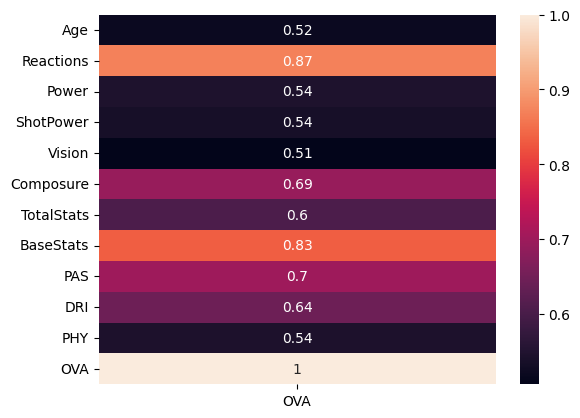

In [453]:
corr_matrix = data_numeric.corr()[['OVA']]
corr_matrix_filtro = corr_matrix[(corr_matrix['OVA']) >= 0.5]
sns.heatmap(corr_matrix_filtro,annot=True)
#corr_matrix_filtro

In [ ]:
#data_numeric_resum = data_numeric.drop(['Unnamed:0','ID','Crossing',	'Finishing',	'HeadingAccuracy',	'ShortPassing',	'Volleys','Dribbling', 'Curve',	'FKAccuracy',	'LongPassing',	'BallControl', 'Acceleration',	'SprintSpeed',	'Agility',	'Reactions',	'Balance', 'ShotPower',	'Jumping',	'Stamina',	'Strength',	'LongShots', 'Aggression',	'Interceptions',	'Positioning',	'Vision',	'Penalties',	'Marking',	'StandingTackle',	'SlidingTackle', 'GKDiving',	'GKHandling',	'GKKicking',	'GKPositioning',	'GKReflexes', 'PAC',	'SHO',	'PAS',	'DRI',	'DEF',	'PHY'],axis=1)
#data_numeric_resum

In [ ]:

###y=data_numeric_resum['OVA']

#el método de OLS de STATSMODELS no te inclye la constante, hayq ue añadirla manuealmente

###X=data_numeric_resum.drop('OVA',axis=1)
###X=sm.add_constant(X)
###model=sm.OLS(y,X).fit() #ordinary least squares (método de mínimos cuadrados) de lo que trata, es busca la mejor distancia de los puntos a las rectas
###model.summary()

In [ ]:
###corr_matrix=data_numeric_resum.corr()
###sns.heatmap(corr_matrix,annot=True)

In [454]:
data_numeric_total= pd.concat([data_numeric2,data_numeric],axis=1)
data_numeric_total

,Height,Weight,Wage,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Age,Growth,Attacking,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Skill,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Movement,Acceleration,SprintSpeed,Agility,Reactions,Balance,Power,ShotPower,Jumping,Stamina,Strength,LongShots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,StandingTackle,SlidingTackle,Goalkeeping,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,TotalStats,BaseStats,PAC,SHO,PAS,DRI,DEF,PHY,OVA
0,5.750000,161,4000,3.0,58.0,58.0,58.0,61.0,62.0,62.0,62.0,61.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,59.0,59.0,59.0,59.0,59.0,58.0,54.0,54.0,54.0,58.0,15,26,1,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,69,51,63,63,51,60,64
1,6.000000,159,23000,44.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,76.0,76.0,76.0,76.0,68.0,68.0,68.0,76.0,57.0,53.0,53.0,53.0,57.0,53.0,48.0,48.0,48.0,53.0,18,30,0,365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,83,75,68,82,33,71,77
2,5.333333,134,49000,73.0,73.0,73.0,73.0,80.0,79.0,79.0,79.0,80.0,80.0,80.0,80.0,79.0,74.0,74.0,74.0,79.0,59.0,56.0,56.0,56.0,59.0,53.0,41.0,41.0,41.0,53.0,12,33,0,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,80,77,78,86,27,56,80
3,5.833333,152,4000,7.0,50.0,50.0,50.0,51.0,51.0,51.0,51.0,51.0,53.0,53.0,53.0,53.0,56.0,56.0,56.0,53.0,56.0,58.0,58.0,58.0,56.0,57.0,58.0,58.0,58.0,57.0,14,22,13,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,57,44,54,57,57,60,59
4,5.916667,150,2000,4.0,56.0,56.0,56.0,59.0,59.0,59.0,59.0,59.0,61.0,61.0,61.0,62.0,63.0,63.0,63.0,62.0,64.0,64.0,64.0,64.0,64.0,63.0,61.0,61.0,61.0,63.0,15,23,8,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,66,44,60,64,60,66,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,5.666667,143,1000,4.0,44.0,44.0,44.0,51.0,48.0,48.0,48.0,51.0,48.0,48.0,48.0,53.0,48.0,48.0,48.0,53.0,58.0,52.0,52.0,52.0,58.0,58.0,54.0,54.0,54.0,58.0,15,21,11,197,59,23,42,51,22.0,207,51,30.0,29,41,56,344,74,78,63.0,50,79.0,245,31,66.0,68,50,30,232,59,52.0,51.0,34.0,36,59.0,167,52,57,58.0,51,6,15,7,10,13,1443,315,76,28,46,55,53,57,60
13696,6.416667,176,700,3.0,22.0,22.0,22.0,20.0,22.0,22.0,22.0,20.0,23.0,23.0,23.0,22.0,24.0,24.0,24.0,22.0,20.0,23.0,23.0,23.0,20.0,20.0,22.0,22.0,22.0,20.0,58,21,9,77,13,9,14,34,7.0,70,9,13.0,10,25,13,192,31,30,36.0,59,36.0,177,43,44.0,23,60,7,88,21,8.0,4.0,36.0,19,33.0,36,14,11,11.0,288,60,55,57,54,62,928,318,60,55,57,62,30,54,59
13697,5.583333,146,9000,15.0,67.0,67.0,67.0,74.0,73.0,73.0,73.0,74.0,76.0,76.0,76.0,75.0,74.0,74.0,74.0,75.0,62.0,60.0,60.0,60.0,62.0,57.0,47.0,47.0,47.0,57.0,18,27,0,332,76,72,34,79,71.0,373,77,76.0,65,77,78,351,64,65,74.0,73,75.0,329,63,60.0,83,57,66,306,41,40.0,75.0,81.0,69,75.0,118,36,43,39.0,58,12,15,16,9,6,1867,388,65,69,78,77,39,60,76
13698,5.916667,176,4000,4.0,55.0,55.0,55.0,56.0,55.0,55.0,55.0,56.0,57.0,57.0,57.0,57.0,59.0,59.0,59.0,57.0,60.0,62.0,62.0,62.0,60.0,60.0,63.0,63.0,63.0,60.0,14,34,0,268,58,44,61,62,43.0,261,56,47.0,37,60,61,288,54,52,57.0,61,64.0,300,53,65.0,68,68,46,297,74,62.0,54.0,56.0,51,60.0,182,61,62,59.0,43,10,7,9,9,8,1639,346,53,47,58,58,61,69,63


In [455]:
data_numeric_total['Hits']=data_numeric_total['Hits'].fillna(np.mean(data_numeric_total['Hits']))

In [456]:
data_numeric_total.isnull().sum().sum()

0

In [457]:
#target= m1*HV1 + m2*IC1 + m3*IC3 + m4*IC4 + m5*IC5 + m6*AVGGIFT
y=data_numeric_total['OVA']
#por convención, los arreglos tipo vector/renglón/columna, se suelen poner con minúsculas
#y los arreglos tipo matriz, suelen llevan mayúsculas
#el método de OLS de STATSMODELS no te inclye la constante, hayq ue añadirla manuealmente
X=data_numeric_total.drop('OVA',axis=1)
X=sm.add_constant(X)
model=sm.OLS(y,X).fit() #ordinary least squares (método de mínimos cuadrados) de lo que trata, es busca la mejor distancia de los puntos a las rectas
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    OVA   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     2134.
Date:                Mon, 03 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:25:19   Log-Likelihood:                -29789.
No. Observations:               13700   AIC:                         5.970e+04
Df Residuals:                   13639   BIC:                         6.016e+04
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              20.5364      1.013     20.266      0.000      18.550      22.523
Height             -0.7029      0.162     -4.342      0.000      -1.020      -0.386
Weight              0.0066      0.002      3.153      0.002       0.003       0.011
Wage              2.93e-05   1.13e-06     25.839      0.000    2.71e-05    3.15e-05
Hits                0.0043      0.000     14.340      0.000       0.004       0.005
LS                 -0.0304      0.017     -1.810      0.070      -0.063       0.003
ST                 -0.0304      0.017     -1.810      0.070      -0.063       0.003
RS                 -0.0304      0.017     -1.810      0.070      -0.063       0.003
LW                 -0.0406      0.026     -1.541      0.123      -0.092       0.011
LF                 -0.0383      0.016     -2.421      0.015      -0.069      -0.007
CF                 -0.0383      0.016     -2.421      0.015      -0.069      -0.007
RF                 -0.0383      0.016     -2.421      0.015      -0.069      -0.007
RW                 -0.0406      0.026     -1.541      0.123      -0.092       0.011
LAM                -0.0559      0.019     -2.976      0.003      -0.093      -0.019
CAM                -0.0559      0.019     -2.976      0.003      -0.093      -0.019
RAM                -0.0559      0.019     -2.976      0.003      -0.093      -0.019
LM                 -0.0061      0.027     -0.224      0.823      -0.059       0.047
LCM                -0.0202      0.019     -1.080      0.280      -0.057       0.016
CM                 -0.0202      0.019     -1.080      0.280      -0.057       0.016
RCM                -0.0202      0.019     -1.080      0.280      -0.057       0.016
RM                 -0.0061      0.027     -0.224      0.823      -0.059       0.047
LWB                -0.0209      0.026     -0.818      0.413      -0.071       0.029
LDM                 0.0742      0.016      4.740      0.000       0.043       0.105
CDM                 0.0742      0.016      4.740      0.000       0.043       0.105
RDM                 0.0742      0.016      4.740      0.000       0.043       0.105
RWB                -0.0209      0.026     -0.818      0.413      -0.071       0.029
LB                  0.1829      0.024      7.743      0.000       0.137       0.229
LCB                -0.0394      0.017     -2.278      0.023      -0.073      -0.005
CB                 -0.0394      0.017     -2.278      0.023      -0.073      -0.005
RCB                -0.0394      0.017     -2.278      0.023      -0.073      -0.005
RB                  0.1829      0.024      7.743      0.000       0.137       0.229
GK                  0.1537      0.044      3.506      0.000       0.068       0.240
Age                 0.0228      0.008      2.779      0.005       0.007       0.039
Growth             -0.1131      0.007    -16.342      0.000

<Axes: >

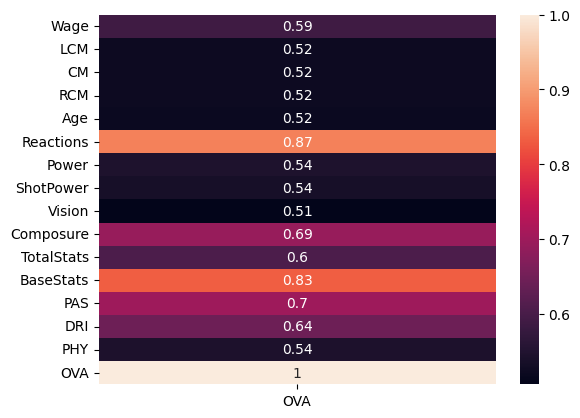

In [458]:
corr_matrix = data_numeric_total.corr()[['OVA']]
corr_matrix_filtro = corr_matrix[(corr_matrix['OVA']) >= 0.5]
sns.heatmap(corr_matrix_filtro,annot=True)


In [459]:
data_numeric_total.describe()

,Height,Weight,Wage,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Age,Growth,Attacking,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Skill,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Movement,Acceleration,SprintSpeed,Agility,Reactions,Balance,Power,ShotPower,Jumping,Stamina,Strength,LongShots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,StandingTackle,SlidingTackle,Goalkeeping,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,TotalStats,BaseStats,PAC,SHO,PAS,DRI,DEF,PHY,OVA
count,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000
mean,5.945730,165.642190,10442.233577,28.519305,56.443504,56.443504,56.443504,57.471679,57.365839,57.365839,57.365839,57.471679,57.659416,57.659416,57.659416,58.093066,56.714745,56.714745,56.714745,58.093066,55.108540,54.702263,54.702263,54.702263,55.108540,54.302044,53.154672,53.154672,53.154672,54.302044,20.822774,25.286058,5.509927,258.313431,51.585766,47.996934,53.460292,60.427956,44.986965,266.382993,57.784964,49.576377,44.389124,54.205620,60.586131,322.597007,65.410365,65.429051,64.578134,62.912117,64.682484,302.159343,59.747810,65.067223,63.222190,65.215328,49.115766,261.734891,56.938686,46.901848,52.397868,55.463459,50.261898,59.920051,140.876934,47.042774,48.094818,45.886716,78.039343,15.685620,15.561825,15.548175,15.597956,15.830292,1630.103942,361.317007,68.108832,55.056423,58.931679,64.236277,50.123577,64.860219,66.945912
std,0.226180,15.810987,21054.511967,75.622645,13.076234,13.076234,13.076234,14.084599,13.714893,13.714893,13.714893,14.084599,13.571339,13.571339,13.571339,13.532236,12.764578,12.764578,12.764578,13.532236,13.287836,13.515860,13.515860,13.515860,13.287836,13.572940,14.603391,14.603391,14.603391,13.572940,14.709191,4.944498,5.797176,72.412379,17.899930,19.411530,17.010578,13.975634,17.732378,77.062358,18.097397,18.184302,17.541672,14.893823,15.946896,55.200803,14.715545,14.482221,14.432508,9.015661,14.084007,49.586804,13.453344,11.954583,15.365887,12.727425,19.085820,63.144215,17.075547,20.807745,19.115461,13.682268,15.740524,11.614333,61.588754,20.190705,21.479614,21.159950,81.789044,16.960759,16.260312,16.086613,16.524135,17.276491,260.986045,40.258414,11.183342,13.839958,10.159851,9.816203,16.815110,9.736964,6.860189
min,5.083333,117.000000,0.000000,3.000000,15.000000,15.000000,15.000000,14.000000,15.000000,15.000000,15.000000,14.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,14.000000,16.000000,16.000000,16.000000,14.000000,14.000000,16.000000,16.000000,16.000000,14.000000,9.000000,16.000000,-1.000000,33.000000,6.000000,3.000000,5.000000,8.000000,4.000000,43.000000,5.000000,4.000000,5.000000,9.000000,5.000000,113.000000,12.000000,11.000000,14.000000,24.000000,17.000000,133.000000,12.000000,22.000000,11.000000,20.000000,4.000000,55.000000,9.000000,4.000000,2.000000,10.000000,7.000000,12.000000,17.000000,

In [ ]:
#Transformacion de df categoricos, la numerica no es necesario porque tiene ya buena r2

In [460]:
X_cat=data_categoric2

In [ ]:
X_cat.isna().sum()

In [462]:
encoder=OneHotEncoder(drop='first').fit(X_cat)
#como el encoder me va a generar más columnas, necesito darle una estructura de numpy
#como suele ordenar las categorías, es por orden alfabético o frecuencia
encoded=encoder.transform(X_cat).toarray()
encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#Aplicación de Regresión Lineal, entrenamiento del Modelo y predicciones train ?test

In [463]:
X_num=data_numeric_total.drop(['OVA'],axis=1)
X=np.concatenate((X_num,encoded),axis=1)

In [ ]:
y=data_numeric_total['OVA']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=195)

In [298]:
lm=linear_model.LinearRegression().fit(X_train,y_train)

In [299]:
predictions=lm.predict(X_train)

In [300]:
r2_score(y_train,predictions)

1.0

In [301]:
predictions

array([68., 61., 60., ..., 57., 57., 74.])

In [302]:
y_train

10427    68
8909     61
4383     60
8425     56
12833    58
         ..
445      60
11263    66
1177     57
3363     57
10185    74
Name: OVA, Length: 10960, dtype: int64

In [303]:
predictions=lm.predict(X_test)

In [304]:
r2_score(y_test,predictions)

0.9656702858936299

In [305]:
predictions

array([73.43038046, 51.49847216, 66.78580368, ..., 56.71402806,
       62.68501531, 68.87152539])

In [306]:
y_train

10427    68
8909     61
4383     60
8425     56
12833    58
         ..
445      60
11263    66
1177     57
3363     57
10185    74
Name: OVA, Length: 10960, dtype: int64